In [5]:
adata = sc.read_h5ad('F:/CRC/AA_Done/GSE178318/GSE178318_processed.h5ad')

In [7]:
bioinfo = pd.read_csv('F:/CRC/AA_Done/GSE178318/41421_2021_312_MOESM2_ESM.csv')

In [8]:
patient = [i.split('_')[1] for i in adata.obs_names]
tissue  = [i.split('_')[2].split('-')[0] for i in adata.obs_names]
sample  = [i.split('_')[1]+'_'+i.split('_')[2] for i in adata.obs_names]

In [9]:
gender_dict = dict(zip(bioinfo['Patient ID'], bioinfo['Gender']))
gender = [gender_dict[i] for i in patient]

In [10]:
age_dict = dict(zip(bioinfo['Patient ID'], bioinfo['Age (years)']))
age = [age_dict[i] for i in patient]

In [11]:
site_dict = dict(zip(bioinfo['Patient ID'], bioinfo['Site of Primary Tumor']))
site = [site_dict[i] for i in patient]

In [12]:
TNM_dict = dict(zip(bioinfo['Patient ID'], bioinfo['TNM']))
TNM = [TNM_dict[i] for i in patient]

In [13]:
T = [i.split('T')[1].split('N')[0] for i in TNM]
N = [j.split('M')[0] for j in [i.split('N')[1] for i in TNM]]
M = [i.split('M')[1] for i in TNM]

In [14]:
stage_dict = dict(zip(bioinfo['Patient ID'], bioinfo['Stage AJCC']))
stage = [stage_dict[i] for i in patient]

In [15]:
adata.obs['patient'] = patient
adata.obs['tissue'] = tissue
adata.obs['sample'] = sample
adata.obs['gender'] = gender
adata.obs['age'] = age
adata.obs['site'] = site
adata.obs['TNM'] = TNM
adata.obs['TNM_T'] = T
adata.obs['TNM_N'] = N
adata.obs['TNM_M'] = M
adata.obs['stage'] = stage

In [16]:
adata.obs['site']= adata.obs['site'].astype('str')
adata.obs['tissue']= adata.obs['tissue'].astype('str')
adata.obs['site'][adata.obs['tissue']!= 'CRC'] = adata.obs['tissue'][adata.obs['tissue']!= 'CRC']
adata.obs['TNM_T'] = adata.obs['TNM_T'].astype(str)
adata.obs['TNM_N'] = adata.obs['TNM_N'].astype(str)
adata.obs['TNM_M'] = adata.obs['TNM_M'].astype(str)
adata.obs['TNM'] = adata.obs['TNM'].astype(str)
adata.obs['stage'] = adata.obs['stage'].astype(str)
adata.obs['stage'][adata.obs['tissue']!= 'CRC'] = 'N/A'
adata.obs['TNM'][adata.obs['tissue']!= 'CRC'] = 'N/A'
adata.obs['TNM_T'][adata.obs['tissue']!= 'CRC'] = 'N/A'
adata.obs['TNM_N'][adata.obs['tissue']!= 'CRC'] = 'N/A'
adata.obs['TNM_M'][adata.obs['tissue']!= 'CRC'] = 'N/A'

In [17]:
adata.obs_names = [i.split('-')[0] for i in adata.obs_names]

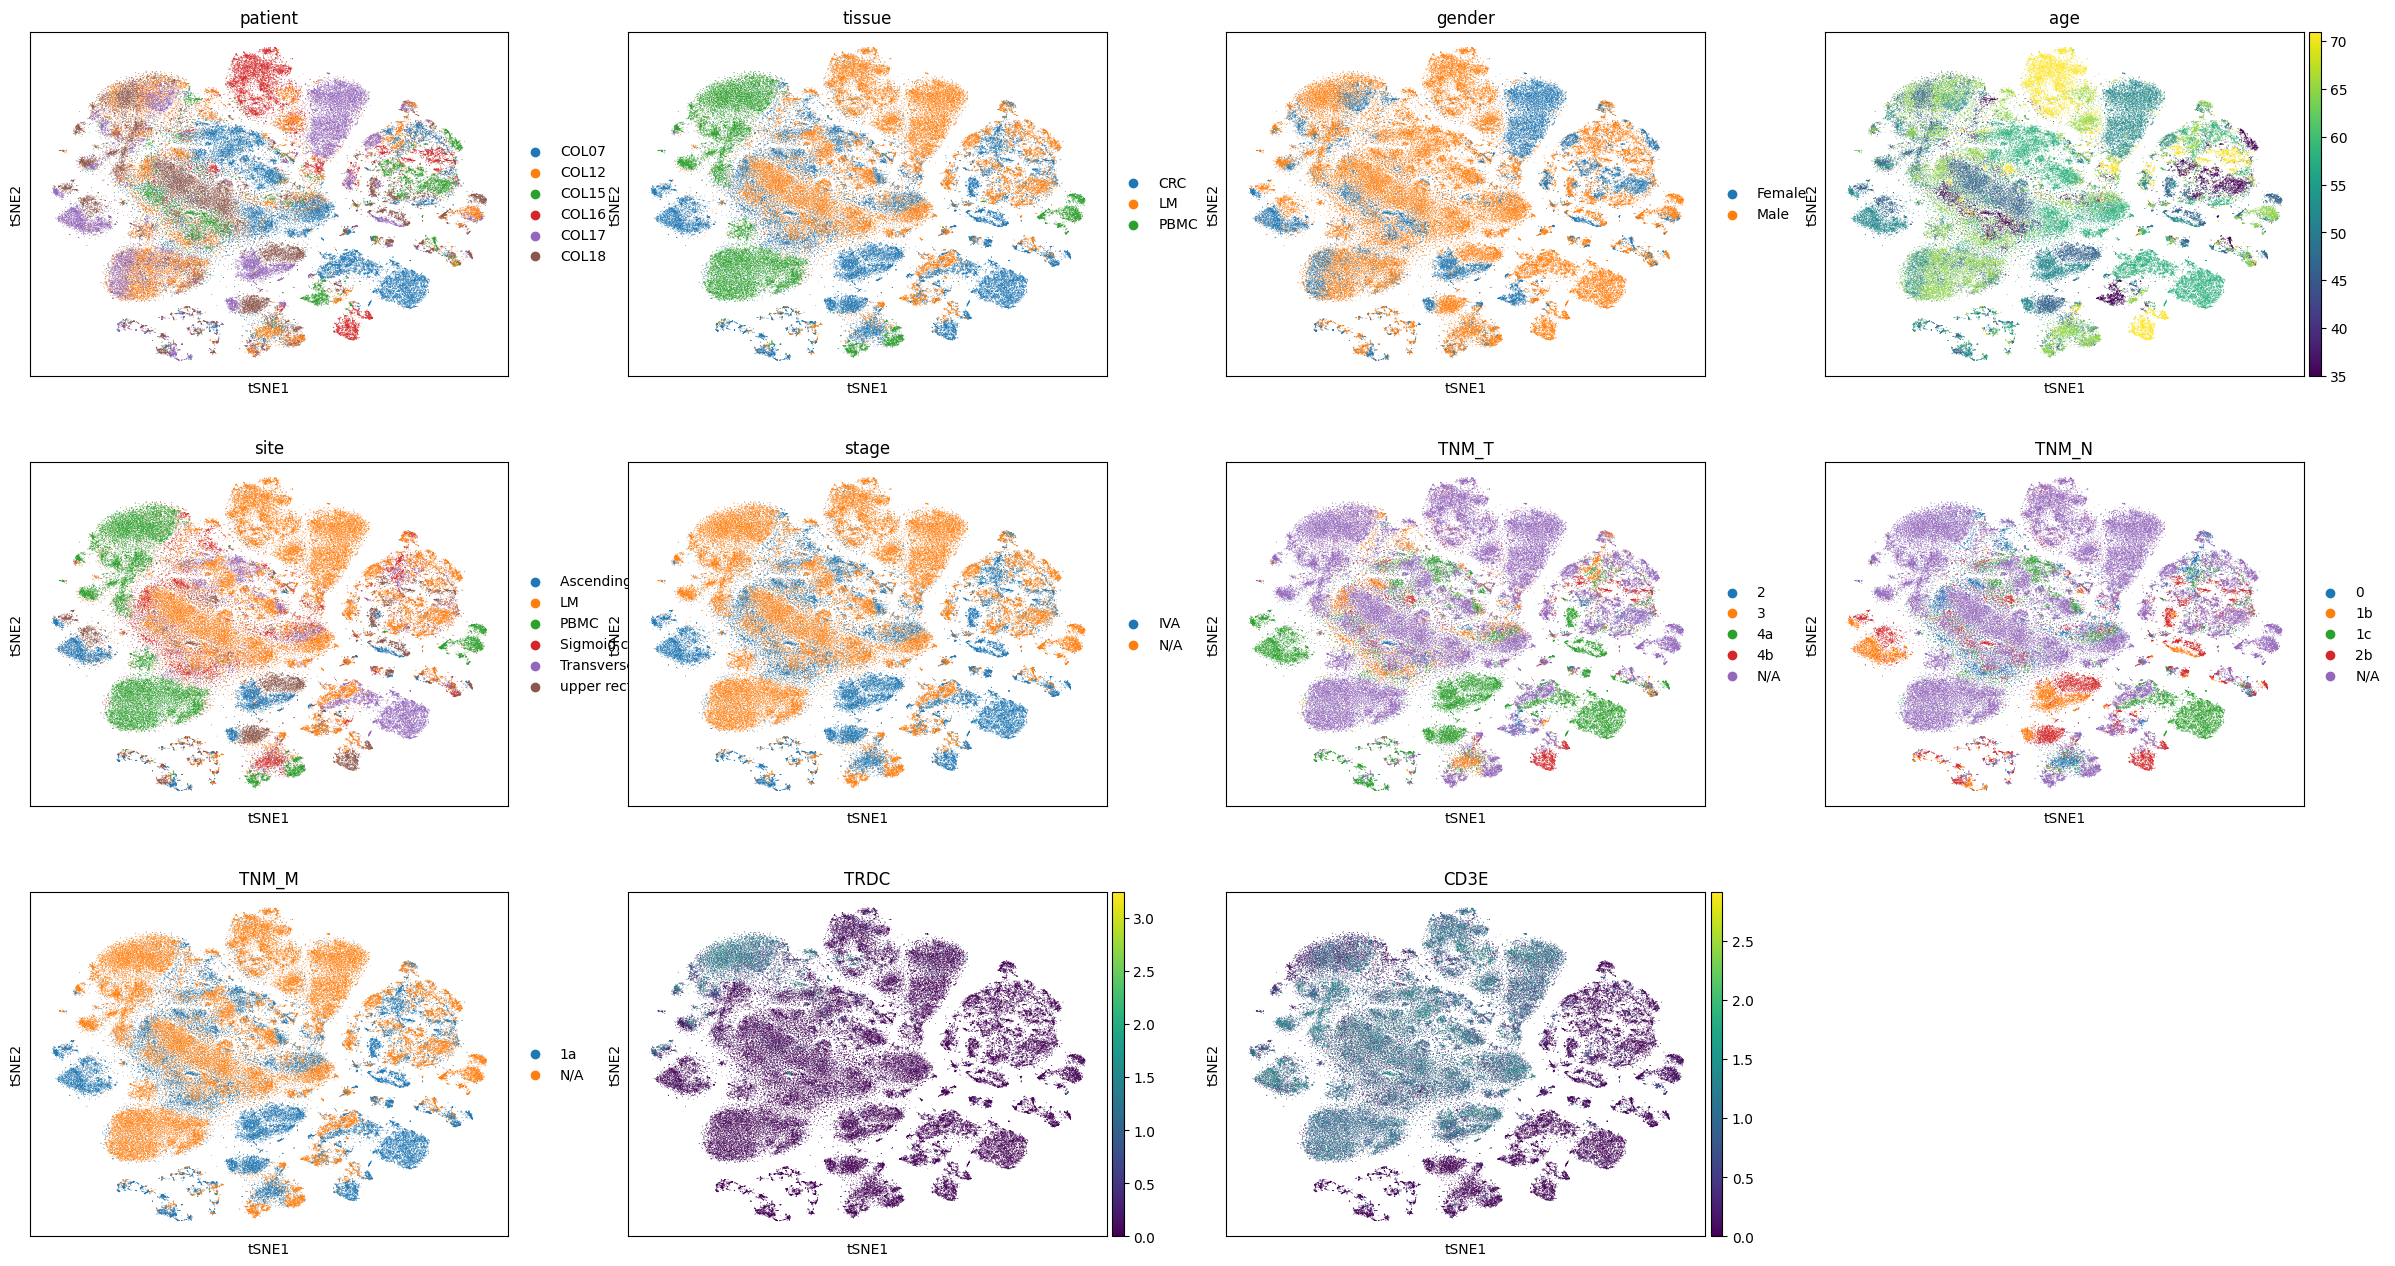

In [25]:
sc.pl.tsne(adata,color = ['patient','tissue','gender','age','site','stage','TNM_T','TNM_N','TNM_M','TRDC','CD3E'])

In [18]:
adata.obs[['patient','tissue','gender','age','site','stage','TNM','TNM_T','TNM_N','TNM_M']]

,patient,tissue,gender,age,site,stage,TNM,TNM_T,TNM_N,TNM_M
AAACCTGAGAAACCTA_COL07_CRC,COL07,CRC,Male,58,Transverse colon,IVA,T4aN1cM1a,4a,1c,1a
AAACCTGAGACAATAC_COL07_CRC,COL07,CRC,Male,58,Transverse colon,IVA,T4aN1cM1a,4a,1c,1a
AAACCTGAGACGCAAC_COL07_CRC,COL07,CRC,Male,58,Transverse colon,IVA,T4aN1cM1a,4a,1c,1a
AAACCTGAGCAGATCG_COL07_CRC,COL07,CRC,Male,58,Transverse colon,IVA,T4aN1cM1a,4a,1c,1a
AAACCTGAGGACATTA_COL07_CRC,COL07,CRC,Male,58,Transverse colon,IVA,T4aN1cM1a,4a,1c,1a
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTGGGACA_COL18_PBMC,COL18,PBMC,Male,46,PBMC,N/A,N/A,N/A,N/A,N/A
TTTGTCATCATGTGGT_COL18_PBMC,COL18,PBMC,Male,46,PBMC,N/A,N/A,N/A,N/A,N/A
TTTGTCATCCGCATCT_COL18_PBMC,COL18,PBMC,Male,46,PBMC,N/A,N/A,N/A,N/A,N/A
TTTGTCATCGGAATCT_COL18_PBMC,COL18,PBMC,Male,46,PBMC,N/A,N/A,N/A,N/A,N/A
